In [1]:
# %reload_ext autoreload
%matplotlib inline
# %autoreload 2

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/opt/conda/lib/python3.7/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
from fastbook import *
import pandas as pd

In [3]:
sample_sub = pd.read_csv("data/sample_submission_stg1.csv")

In [4]:
sample_sub

,image,ALB,BET,DOL,LAG,NoF,OTHER,SHARK,YFT
0,img_00005.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283
1,img_00007.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283
2,img_00009.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283
3,img_00018.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283
4,img_00027.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283
...,...,...,...,...,...,...,...,...,...
995,img_07905.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283
996,img_07906.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283
997,img_07908.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283
998,img_07910.jpg,0.455003,0.052938,0.030969,0.017734,0.123081,0.079142,0.046585,0.194283


In [5]:
doc(ImageDataLoaders.from_folder)

In [6]:
dls = ImageDataLoaders.from_folder(path = "data/train",
                                  train = "train",
                                  valid_pct = 0.2, 
                                  seed = 1991,
                                  item_tfms = Resize(448),
                                  batch_tfms = aug_transforms(),
                                  bs = 64)

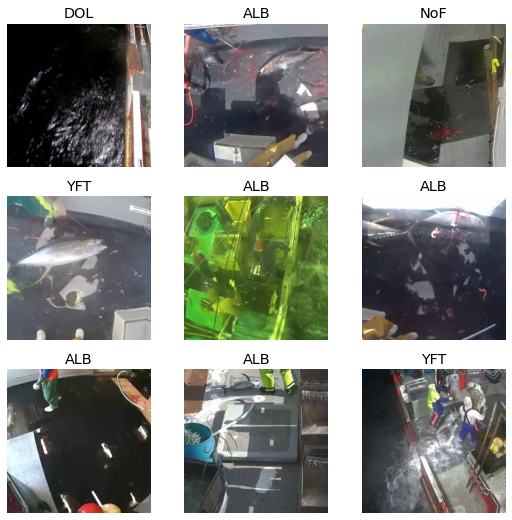

In [7]:
dls.show_batch()

In [12]:
type(dls)

fastai.data.core.DataLoaders

In [27]:
amounts = {}

In [32]:
int(dls.train_ds[0][1])

7

In [28]:
?amounts.get

In [33]:
for item in dls.train_ds:
    category_number = int(item[1])
    category_name = dls.vocab[category_number]
    amounts[category_name] = amounts.get(category_name, 0) + 1

In [34]:
amounts

{'YFT': 595,
 'ALB': 1373,
 'OTHER': 241,
 'NoF': 362,
 'BET': 160,
 'LAG': 54,
 'SHARK': 141,
 'DOL': 96}

In [35]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

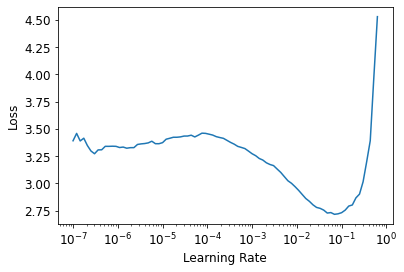

In [9]:
lr_min,lr_steep = learn.lr_find()

In [42]:
print(f"Minimum loss/10 {lr_min:.2e}, Steepest point {lr_steep:.2e}")

Minimum loss/10 6.92e-03, Steepest point 4.37e-03


In [54]:
learn.fit_one_cycle??

In [45]:
learn.fit_one_cycle(5,lr_steep)

epoch,train_loss,valid_loss,error_rate,time
0,2.161956,0.909398,0.263576,01:10
1,1.402107,0.618202,0.189404,01:09
2,0.973309,0.436293,0.135099,01:09
3,0.683260,0.364354,0.121854,01:09
4,0.526214,0.337104,0.112583,01:09


In [46]:
learn.save("resnet34_stage1")

Path('data/train/models/resnet34_stage1.pth')

In [47]:
learn.load("resnet34_stage1")

In [48]:
learn.unfreeze()

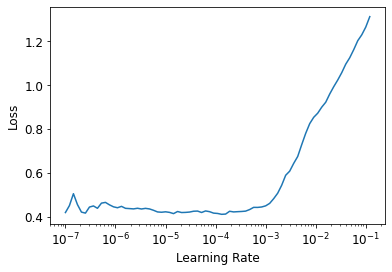

In [50]:
lr_min, lr_steep = learn.lr_find()

In [52]:
print(f"Minimum loss/10: {lr_min:.2e} Steepest point: {lr_steep:.2e}")

Minimum loss/10: 1.32e-05 Steepest point: 6.31e-07


In [55]:
learn.fit_one_cycle(5, lr_max = lr_min)

epoch,train_loss,valid_loss,error_rate,time
0,0.431206,0.321478,0.096689,01:38
1,0.400528,0.319644,0.099338,01:38
2,0.371088,0.271683,0.084768,01:38
3,0.348760,0.260718,0.076821,01:38
4,0.329326,0.261610,0.072848,01:38


In [60]:
learn.save("resnet34_stage2")

Path('data/train/models/resnet34_stage2.pth')

# Predicting

In [62]:
learn.load("resnet34_stage2")

In [67]:
dls.test_dl??

In [57]:
??learn.predict